In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [16]:
# Sentences to train the model
sentences = [
    "War divides, peace unites",
    "Music is harmony, noise is chaos",
    "Light reveals, darkness hides",
    "The desert is arid, the sea is deep",
    "The dream inspires, reality materializes",
    "Desire pushes, reason holds back",
    "Art evokes, science demonstrates",
    "Instinct guides, logic corrects",
    "The past teaches, the future calls",
    "Ambition challenges, humility balances",
    "Thought explores, emotion overwhelms",
    "Imagination flies, reality walks"
]


In [17]:
def fast_split(sent):
    return [word for word in sent.split() if word != ',']

# Define training data
sentences = [fast_split(sentence) for sentence in sentences]


Word2Vec is a machine learning algorithm for word vector representation. It is a word embedding model, meaning it converts words into numerical vectors in a continuous space so that words with similar meanings have similar representations.

In simple terms, Word2Vec transforms words into dense vectors (instead of representing them as sparse and inefficient "one-hot encoding"), capturing semantic and syntactic relationships between them.

In [18]:
# Train Word2Vec model
model = Word2Vec(sentences, min_count=1, vector_size=10,  window=5, sg=1)


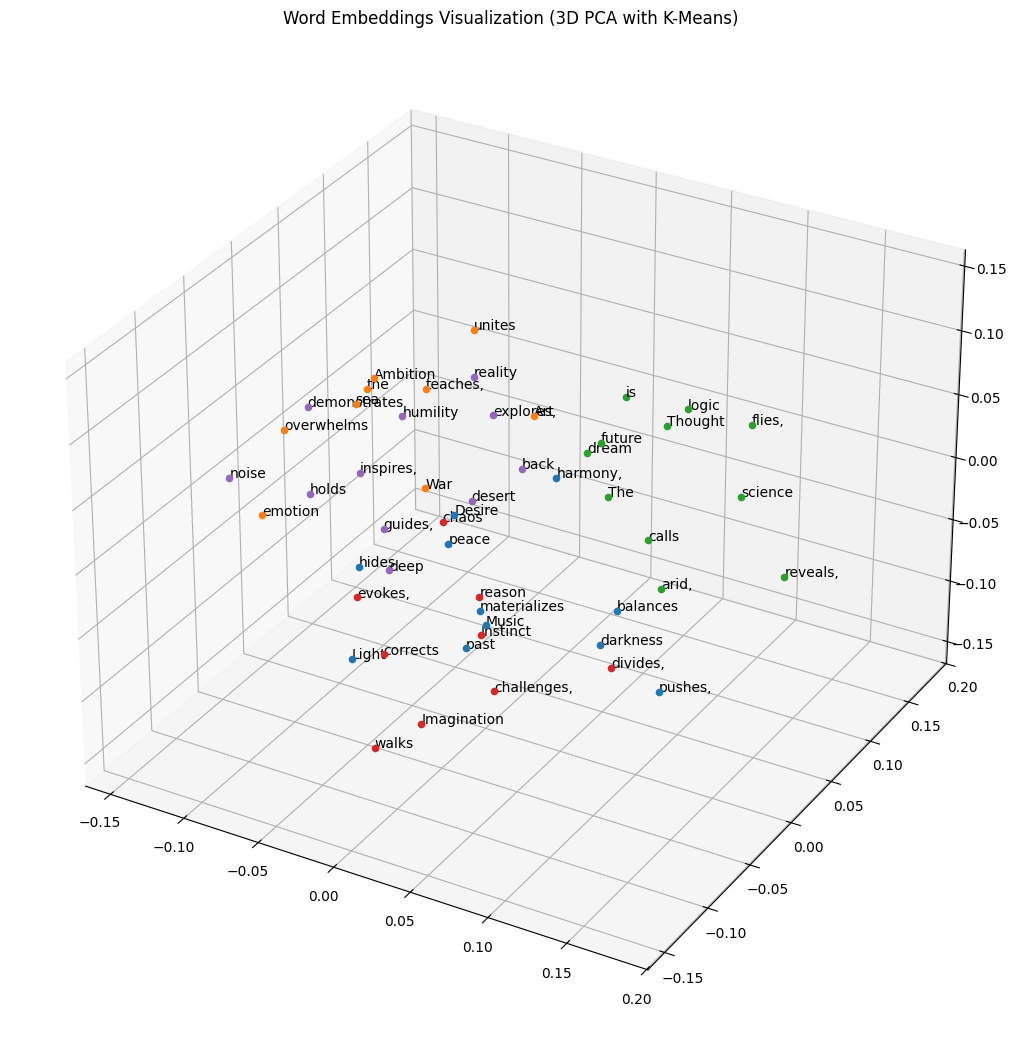

array([0.18506896, 0.1659551 , 0.13417211], dtype=float32)

In [19]:
# Get word vectors
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

# Reduce dimensions using PCA
pca = PCA(n_components=5)
reduced_vectors = pca.fit_transform(vectors)

# Explained variance by first 3 components
explained_variance = pca.explained_variance_ratio_[:3]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(reduced_vectors)

# Plot in 3D with clustering colors
fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], c=f'C{labels[i]}', label=f'Cluster {labels[i]}')
    ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=10)

ax.set_title("Word Embeddings Visualization (3D PCA with K-Means)")
plt.show()

# Output explained variance
explained_variance


In [20]:
# Dataset of tokenized sentences
sentences = [
    ["cat", "animal", "pet"],
    ["dog", "animal", "loyal"],
    ["king", "man", "crown"],
    ["queen", "woman", "crown"]
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=20, min_count=1, window=2, sg=1)

# Find similar words
similar_words = model.wv.most_similar("queen")

print(similar_words)

[('woman', 0.23025108873844147), ('loyal', 0.18296225368976593), ('animal', 0.1523708552122116), ('cat', 0.08863796293735504), ('crown', 0.05595848336815834), ('dog', -0.06000335514545441), ('king', -0.182404026389122), ('man', -0.27469438314437866), ('pet', -0.29063406586647034)]
